In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [8]:
import sqlite3
import csv

connection = sqlite3.connect("..//db.sqlite3")
cursor = connection.cursor()

orderitem = "SELECT order_id, product_id, quantity, price, name, datetime" \
            " FROM restaurant_orderitem  " \
            "JOIN restaurant_product on restaurant_orderitem.product_id = restaurant_product.id " \
            "JOIN restaurant_order on restaurant_orderitem.order_id = restaurant_order.id;"
cursor.execute(orderitem)
orderitem_data = cursor.fetchall()

cursor.close()
connection.close()
combined_data = [("OrderItems", orderitem_data)]

def write_to_csv(combined_data, file_name):
    with open(file_name, "w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)
        for table_name, data in combined_data:
            csv_writer.writerow([i[0] for i in cursor.description])
            csv_writer.writerows(data)

combined_csv_file = "combined_data2.csv"
write_to_csv(combined_data, combined_csv_file)

df = pd.read_csv("combined_data2.csv")
df.describe()

,order_id,product_id,quantity,price
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,5756.303563,66.604975,1.243564,5.267512
std,3745.827156,62.940364,0.798207,3.325707
min,1.000000,1.000000,1.000000,0.500000
25%,2461.000000,15.000000,1.000000,2.950000
50%,5308.000000,39.000000,1.000000,3.950000
75%,8913.000000,103.000000,1.000000,8.950000
max,13397.000000,248.000000,51.000000,17.950000


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 positions in menu by quantity'}>

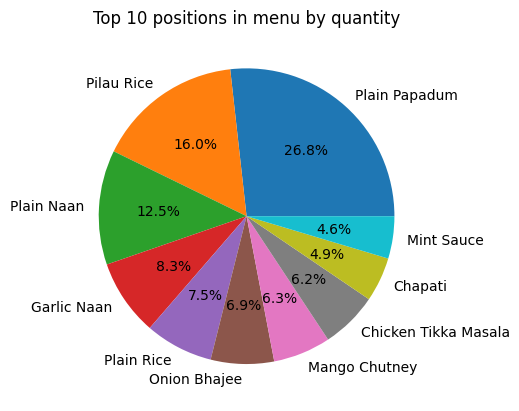

In [9]:
top_products = df.groupby("name")["quantity"].sum()
top_products.sort_values(ascending=False).head(10).plot.pie\
    (title="Top 10 positions in menu by quantity",  autopct="%1.1f%%", ylabel="")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'The most profit products'}>

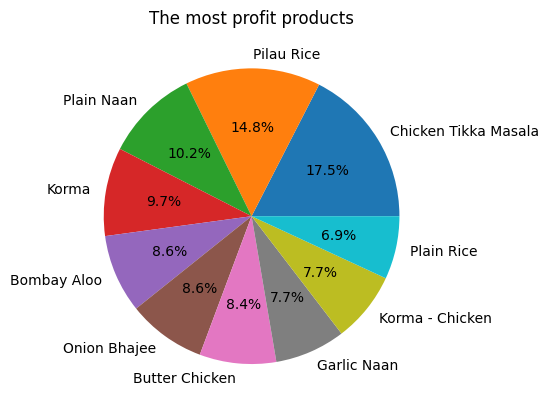

In [10]:
df["Item Price"] = df["quantity"] * df["price"]
most_profit_products = df.groupby("name")["Item Price"].sum()
most_profit_products.sort_values(ascending=False).head(10).plot.pie\
    (title="The most profit products",  autopct="%1.1f%%", ylabel="")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Profit by order hour'}, xlabel='Order Hour', ylabel='Total profit'>

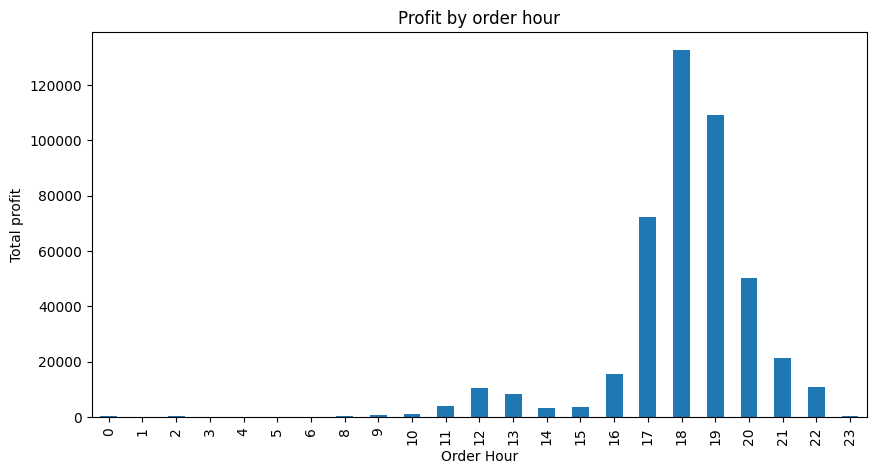

In [11]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["datetime"].dt.hour
order_hour_profit = df.groupby("Order Hour")["Item Price"].sum()
order_hour_profit.plot.bar(title="Profit by order hour", figsize=(10,5), ylabel="Total profit")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

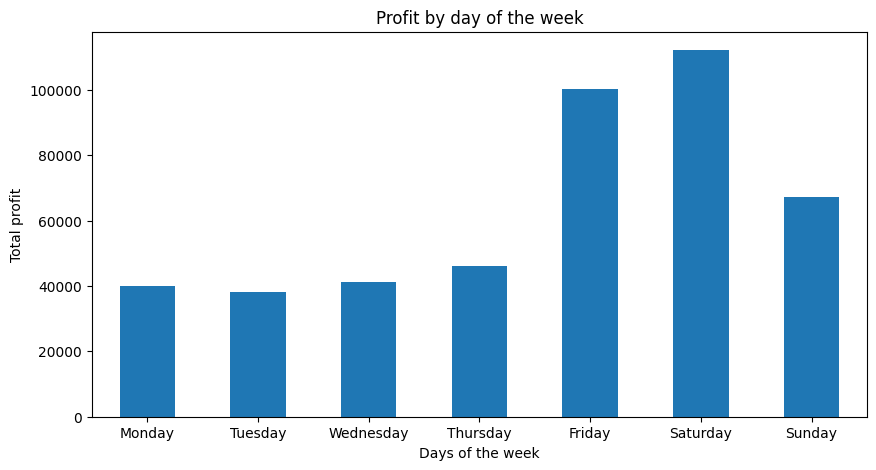

In [12]:
df["Day of the week"] = df["datetime"].dt.dayofweek
day_profit = df.groupby("Day of the week")["Item Price"].sum()
day_names = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
diagram = day_profit.plot.bar(title="Profit by day of the week", figsize=(10,5), rot=0, ylabel="Total profit", xlabel="Days of the week")
diagram.set_xticklabels([day_names[day] for day in day_profit.index])
plt.show()